**Tugas Akhir Mata Kuliah Probabilitas dan Proses Stokastik - 03**

**Atlet China**

oleh: Hanif Imam - 1706043273

**Setup dan Import Data**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
Data = files.upload()

Saving atlet_cina.csv to atlet_cina.csv
Saving hdi.csv to hdi.csv


In [0]:
import io
athlete_chn   = pd.read_csv(io.BytesIO(Data['atlet_cina.csv']), sep=";")

In [4]:
athlete_chn.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,70551,Liu Changchun,M,22.0,NaN,NaN,China,CHN,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 100 metres,NaN
1,70551,Liu Changchun,M,22.0,NaN,NaN,China,CHN,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 200 metres,NaN
2,54765,Jia Lianren,M,23.0,NaN,NaN,China,CHN,1936 Summer,1936,Summer,Berlin,Athletics,"Athletics Men's 1,500 metres",NaN
3,20228,Chen Kingkwan,M,23.0,NaN,NaN,China,CHN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's 100 metres,NaN
4,70551,Liu Changchun,M,26.0,NaN,NaN,China,CHN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's 100 metres,NaN


In [5]:
athlete_chn.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [6]:
ath_sum     = athlete_chn[athlete_chn.Season == 'Summer']
ath_win     = athlete_chn[athlete_chn.Season == 'Winter']

ath_fem_a   = ath_sum[ath_sum.Sex == 'F']
ath_mal_a   = ath_sum[ath_sum.Sex == 'M']

ath_fem     = ath_fem_a.groupby('Year').count()[['Sex']]
ath_mal     = ath_mal_a.groupby('Year').count()[['Sex']]
ath_tot     = ath_sum.groupby('Year').count()[['ID']]

ath_nam_a   = ath_sum.groupby(['Year', 'Name']).count()[['ID']]
ath_nam     = ath_nam_a.groupby('Year').count()

ath_fem = ath_fem.rename(columns = {"Sex":"fem_ath"})
ath_mal = ath_mal.rename(columns = {"Sex":"mal_ath"})
ath_tot = ath_tot.rename(columns = {"ID":"tot_ath"}) 
ath_nam = ath_nam.rename(columns = {"ID":"nam_ath"}) 

ath_nam

,nam_ath
Year,
1932,1
1936,54
1948,31
1952,1
1984,215
1988,271
1992,243
1996,289
2000,266


In [0]:
ath_age_a = ath_sum[np.isfinite(ath_sum['Age'])]
ath_hei_a = ath_sum[np.isfinite(ath_sum['Height'])]
ath_wei_a = ath_sum[np.isfinite(ath_sum['Weight'])]

ath_age   = ath_age_a.groupby('Year').mean()[['Age']]
ath_hei   = ath_hei_a.groupby('Year').mean()[['Height']]
ath_wei   = ath_wei_a.groupby('Year').mean()[['Weight']]



**Mendata jumlah Medali Negara Cina**

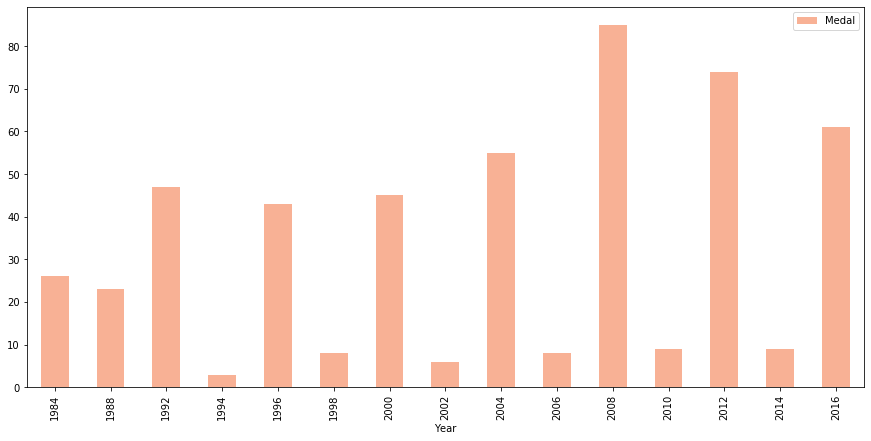

In [8]:
medals          = pd.notnull(athlete_chn['Medal'])
athlete_medals  = athlete_chn[medals]

medal_summer = athlete_medals[(athlete_medals.Season == 'Summer')]
medal_winter = athlete_medals[(athlete_medals.Season == 'Winter')]

total_count      = athlete_medals.groupby(['Year', 'Event']).count()[['Medal']]
summer_count     = medal_summer.groupby(['Year', 'Event']).count()[['Medal']]
winter_count     = medal_winter.groupby(['Year', 'Event']).count()[['Medal']]

total_groupx    = total_count.groupby('Year').count()
total_group     = total_groupx.reset_index()

summer_groupx   = summer_count.groupby('Year').count()
summer_group    = summer_groupx.reset_index()

winter_groupx   = winter_count.groupby('Year').count()
winter_group    = winter_groupx.reset_index()

fig, ax = plt.subplots(figsize=(15,7))
total_bar      = total_count.groupby('Year').count().plot.bar(ax=ax, color='#f8b195')
total_bar

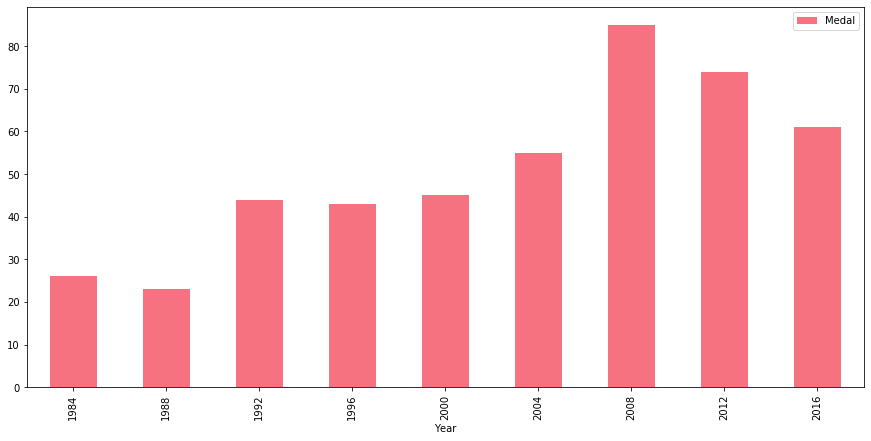

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
summer_bar      = summer_count.groupby('Year').count().plot.bar(ax=ax, color='#f67280')
summer_bar

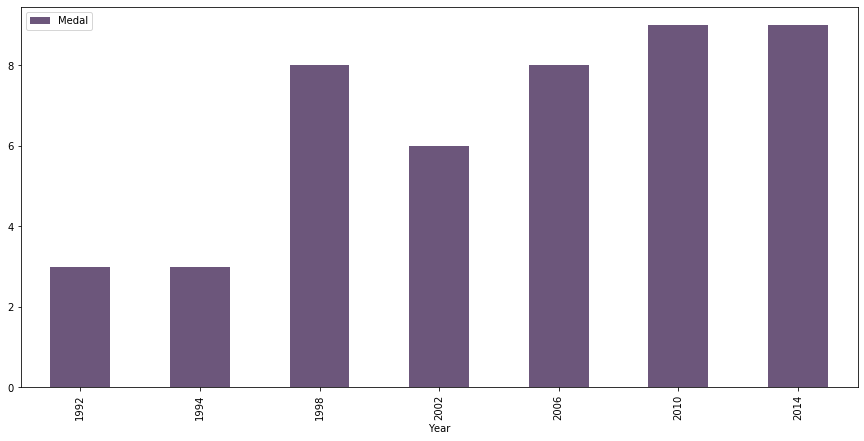

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
winter_bar      = winter_count.groupby('Year').count().plot.bar(ax=ax, color='#6c567b')
winter_bar

In [11]:
sum_cou = ath_sum.groupby(['Year', 'Event']).count()
sum_cou

ID  Name  ...  Sport  Medal
Year Event                                                     ...              
1932 Athletics Men's 100 metres                       1     1  ...      1      0
     Athletics Men's 200 metres                       1     1  ...      1      0
1936 Athletics Men's 1,500 metres                     1     1  ...      1      0
     Athletics Men's 100 metres                       3     3  ...      3      0
     Athletics Men's 110 metres Hurdles               2     2  ...      2      0
...                                                  ..   ...  ...    ...    ...
2016 Wrestling Women's Featherweight, Freestyle       1     1  ...      1      0
     Wrestling Women's Flyweight, Freestyle           1     1  ...      1      1
     Wrestling Women's Heavyweight, Freestyle         1     1  ...      1      1
     Wrestling Women's Light-Heavyweight, Freestyle   1     1  ...      1      0
     Wrestling Women's Middleweight, Freestyle        1     1  ...      1      0

[1635 rows x 13 columns]

In [12]:
sum(sum_cou.Medal)

909

**Memvisualisasikan data World Bank negara Cina**

In [83]:
!pip install wbdata
import wbdata
import datetime
import matplotlib as mpl

In [0]:
countries = ["CHN"]
indicators = {'NY.GDP.PCAP.CD':'gdp_pc'}
dates = (datetime.datetime(1960,1,1), datetime.datetime(2018,1,1))

gdp_p = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
gdp = gdp_p.sort_values('date', ascending=1)
gdp_r = gdp.reset_index()
gdp_f = gdp_r.rename(columns = {"date":"Year"}) 

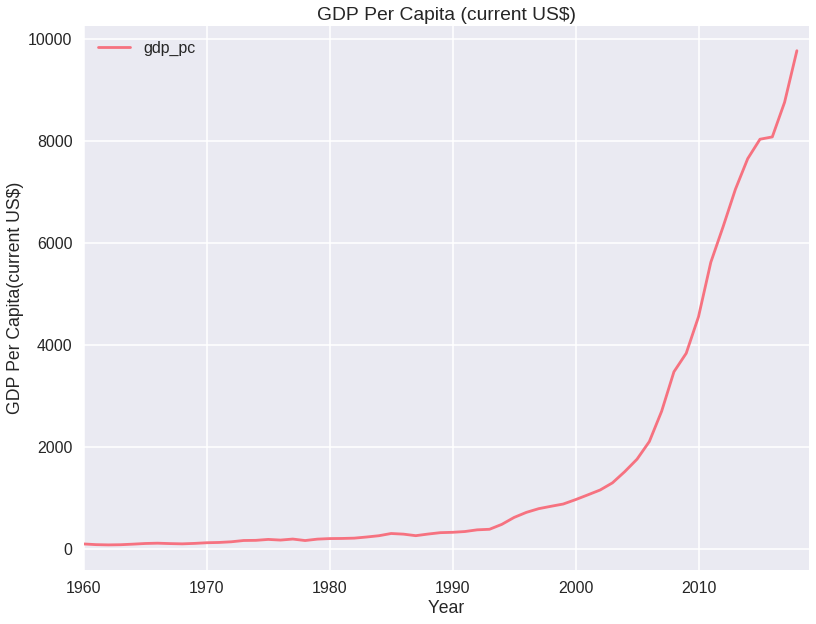

In [34]:
mpl.style.use('seaborn-poster')
gdp.plot(figsize=(13,10), color='#f67280'); 
plt.legend(loc='best'); 
plt.title("GDP Per Capita (current US$)"); 
plt.xlabel('Year'); plt.ylabel('GDP Per Capita(current US$)');

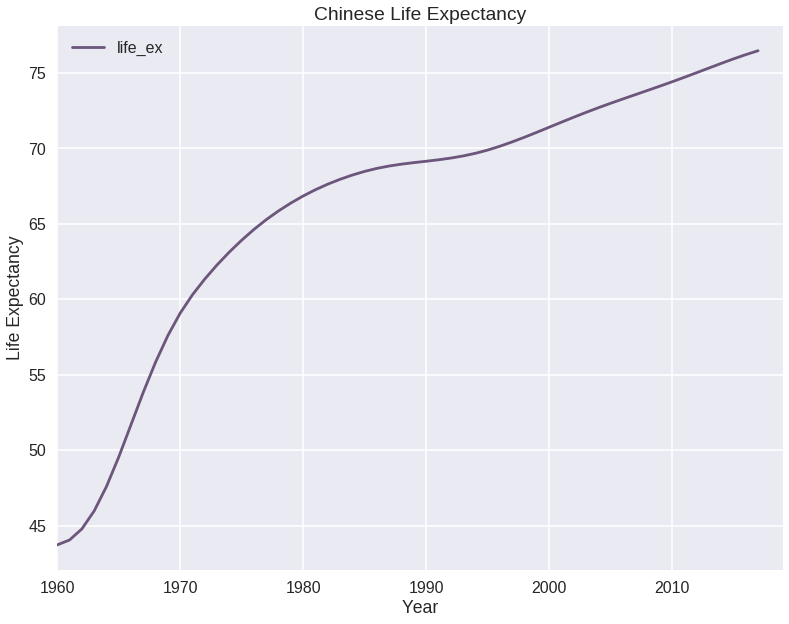

In [37]:
countries = ["CHN"]
indicators = {'SP.DYN.LE00.IN':'life_ex'}
lfx_p = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
lfx = lfx_p.sort_values('date', ascending=1)

mpl.style.use('seaborn-poster')
lfx.plot(figsize=(13,10), color='#6c567b'); 
plt.legend(loc='best'); 
plt.title("Chinese Life Expectancy"); 
plt.xlabel('Year'); plt.ylabel('Life Expectancy');

In [27]:
mpl.style.available

['classic',
 'seaborn-ticks',
 'Solarize_Light2',
 'ggplot',
 '_classic_test',
 'seaborn-dark',
 'dark_background',
 'seaborn',
 'tableau-colorblind10',
 'bmh',
 'seaborn-talk',
 'seaborn-poster',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-muted',
 'fast',
 'grayscale',
 'seaborn-deep',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-white']

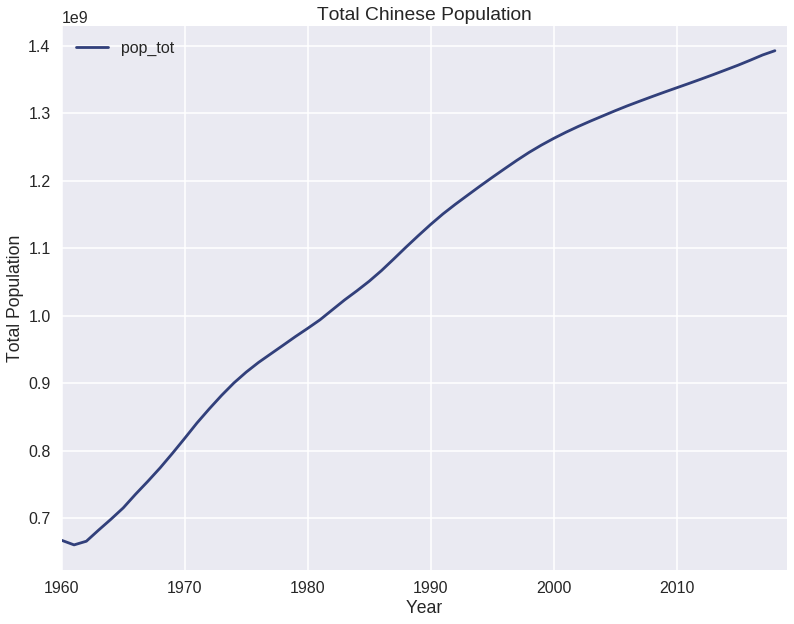

In [36]:
countries = ["CHN"]
indicators = {'SP.POP.TOTL':'pop_tot'}
pop_p = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
pop = pop_p.sort_values('date', ascending=1)

mpl.style.use('seaborn-poster')
pop.plot(figsize=(13,10), color='#32407b'); 
plt.legend(loc='best'); 
plt.title("Total Chinese Population"); 
plt.xlabel('Year'); plt.ylabel('Total Population');

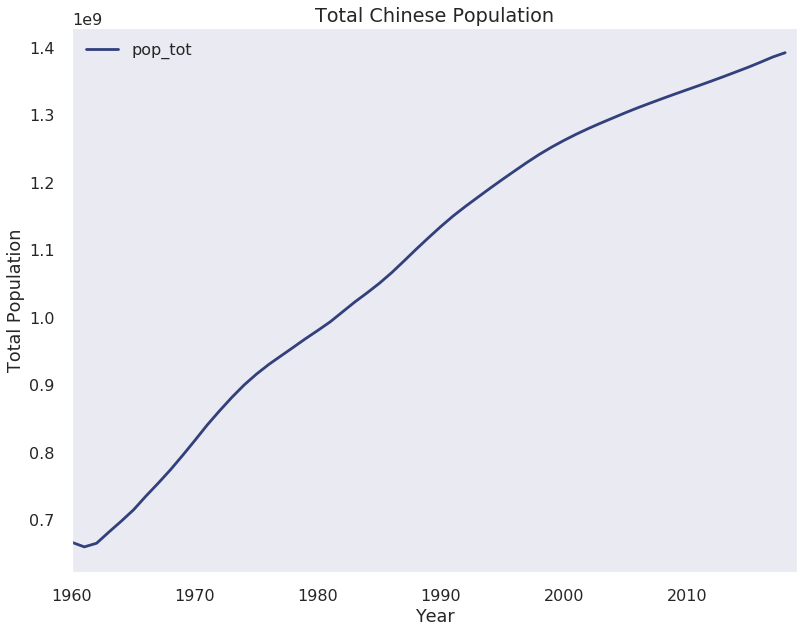

In [47]:
countries = ["CHN"]
indicators = {'SP.POP.TOTL':'pop_tot'}
pop_p = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
pop = pop_p.sort_values('date', ascending=1)

mpl.style.use('seaborn-poster')
pop.plot(figsize=(13,10), color='#32407b'); 
plt.legend(loc='best'); 
plt.title("Total Chinese Population"); 
plt.xlabel('Year'); plt.ylabel('Total Population');

In [59]:
countries = ["CHN"]
indicators = {'SP.DYN.LE00.IN':'life_ex', 'NY.GDP.PCAP.CD':'gdp_pc', 'NY.GDP.MKTP.CD':'gdp', 'NY.GNP.PCAP.CD':'gni_pc', 'NY.GNP.ATLS.CD':'gni', 'IQ.SCI.OVRL':'sta_cap', 'SE.PRM.ENRR':'sch_pri', 'AG.LND.TOTL.K2':'lan_are', 'EN.ATM.PM25.MC.M3':'air_pol', 'AG.PRD.FOOD.XD':'food_pro', 'SI.DST.FRST.20':'inc_120', 'SI.DST.02ND.20':'inc_220', 'SI.DST.03RD.20':'inc_320', 'SI.DST.04TH.20':'inc_420', 'SI.DST.05TH.20':'inc_520', 'SP.POP.TOTL':'pop_tot',  'SP.URB.TOTL.IN.ZS':'urb_pop', 'SP.POP.TOTL.FE.ZS':'fem_pop', 'SP.POP.0014.TO.ZS':'0014_pop', 'SP.POP.1564.TO.ZS':'1564_pop', 'SP.POP.65UP.TO.ZS':'65up_pop'}
world_chn_p = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
world_chn_r = world_chn_p.sort_values('date', ascending=1)
world_chn_y   = world_chn_r.reset_index()
world_chn_a = world_chn_y.rename(columns = {"date":"Year"}) 
world_chn   = world_chn_a.astype({"Year":int})

world_chn['Log_GDP'] = np.log(world_chn['gdp'])
world_chn['Log_Pop'] = np.log(world_chn['pop_tot'])

world_chn   = world_chn.set_index('Year')

world_chn.head()

,life_ex,gdp_pc,gdp,gni_pc,gni,sta_cap,sch_pri,lan_are,air_pol,food_pro,inc_120,inc_220,inc_320,inc_420,inc_520,pop_tot,urb_pop,fem_pop,0014_pop,1564_pop,65up_pop,Log_GDP,Log_Pop
Year,,,,,,,,,,,,,,,,,,,,,,,
1960,43.725,89.520542,5.971647e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667070000.0,16.203,48.455821,39.822192,56.489299,3.688510,24.812874,20.318406
1961,44.051,75.805838,5.005687e+10,NaN,NaN,NaN,NaN,9388250.0,NaN,13.36,NaN,NaN,NaN,NaN,NaN,660330000.0,16.708,48.483855,39.874431,56.414306,3.711263,24.636426,20.308250
1962,44.783,70.909412,4.720936e+10,70.0,4.578572e+10,NaN,NaN,9388250.0,NaN,14.11,NaN,NaN,NaN,NaN,NaN,665770000.0,17.226,48.508282,40.282471,56.043207,3.674322,24.577858,20.316455
1963,45.972,74.313643,5.070680e+10,80.0,5.245896e+10,NaN,NaN,9388250.0,NaN,14.89,NaN,NaN,NaN,NaN,NaN,682335000.0,17.757,48.530508,40.807495,55.593322,3.599183,24.649326,20.341031
1964,47.592,85.498555,5.970834e+10,90.0,6.133448e+10,NaN,NaN,9388250.0,NaN,16.05,NaN,NaN,NaN,NaN,NaN,698355000.0,18.299,48.552414,41.139201,55.348429,3.512369,24.812738,20.364238


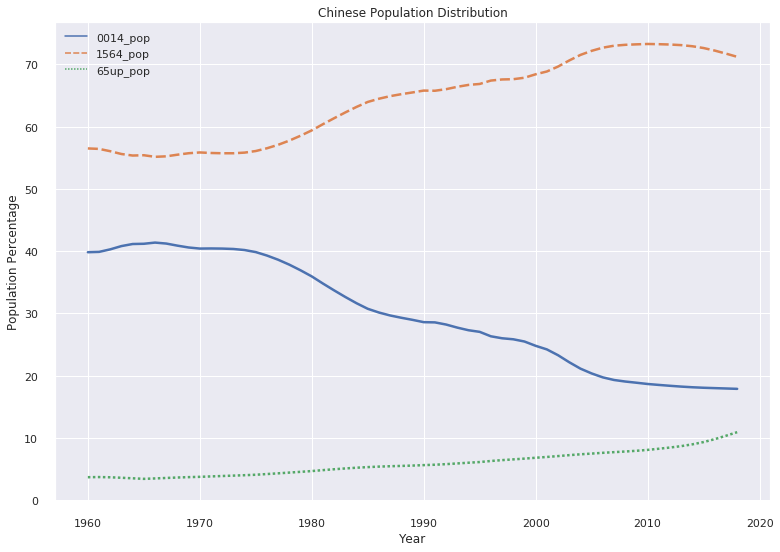

In [57]:
sns.set(style="darkgrid")

data = pd.DataFrame(world_chn, columns=["0014_pop", "1564_pop", "65up_pop"])

sns.lineplot(data=data, palette="deep", linewidth=2.5)

plt.legend(loc='best'); 
plt.title("Chinese Population Distribution"); 
plt.xlabel('Year'); plt.ylabel('Population Percentage');

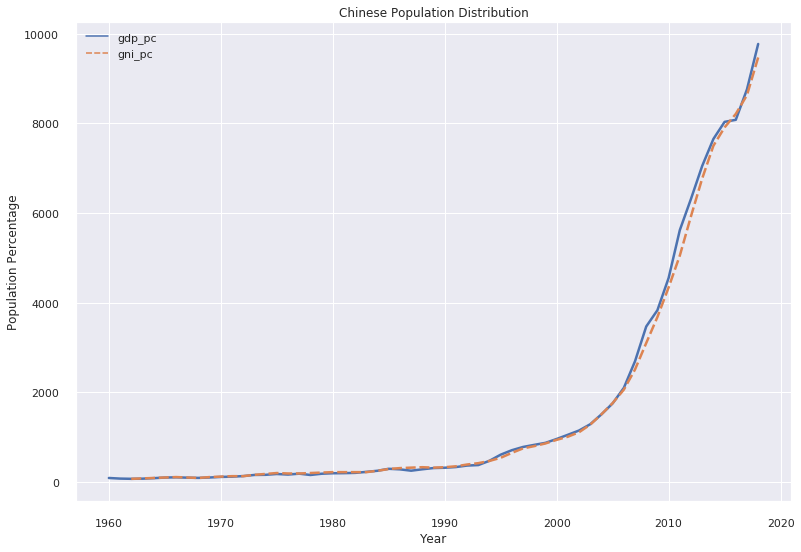

In [62]:
sns.set(style="darkgrid")

data = pd.DataFrame(world_chn, columns=["gdp_pc", "gni_pc"])

sns.lineplot(data=data, palette="deep", linewidth=2.5)

plt.legend(loc='best'); 
plt.title("Chinese Population Distribution"); 
plt.xlabel('Year'); plt.ylabel('Population Percentage');

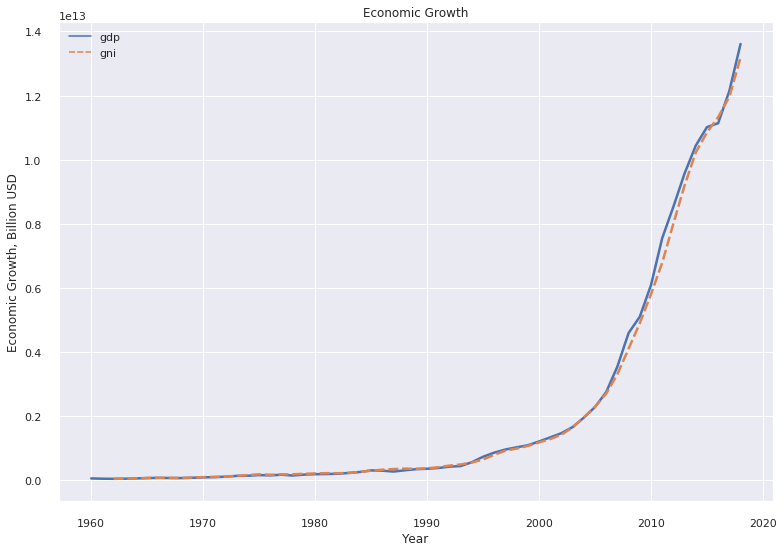

In [63]:
sns.set(style="darkgrid")

data = pd.DataFrame(world_chn, columns=["gdp", "gni"])

sns.lineplot(data=data, palette="deep", linewidth=2.5)

plt.legend(loc='best'); 
plt.title("Economic Growth"); 
plt.xlabel('Year'); plt.ylabel('Economic Growth, Billion USD');

In [92]:
world_chn.isnull().any()

Year        False
gdp_pc       True
pop_tot      True
life_ex      True
gdp          True
gni_pc       True
sta_cap      True
sch_pri      True
lan_are      True
air_pol      True
food_pro     True
inc_120      True
inc_220      True
inc_320      True
inc_420      True
inc_520      True
urb_pop      True
fem_pop      True
0014_pop     True
1564_pop     True
65up_pop     True
Log_GDP      True
Log_Pop      True
dtype: bool

**Finding Correlation between Medal Count and World Bank Data**

In [0]:
hdi_world   = pd.read_csv(io.BytesIO(Data['hdi.csv']), sep=";")

In [42]:
hdi_world_a = hdi_world.rename(columns = {"Country":"Year", "China":"HDI"}) 
hdi_world_b   = hdi_world_a.astype({"Year":int})
hdi_world_c   = hdi_world_b.astype({"HDI":float})

hdi_chn   = hdi_world_c.loc[1:, ['Year', 'HDI']] 
hdi_chn   = hdi_chn.set_index('Year')

hdi_chn.head()

,HDI
Year,
1991,0.509
1992,0.520
1993,0.530
1994,0.537
1995,0.549


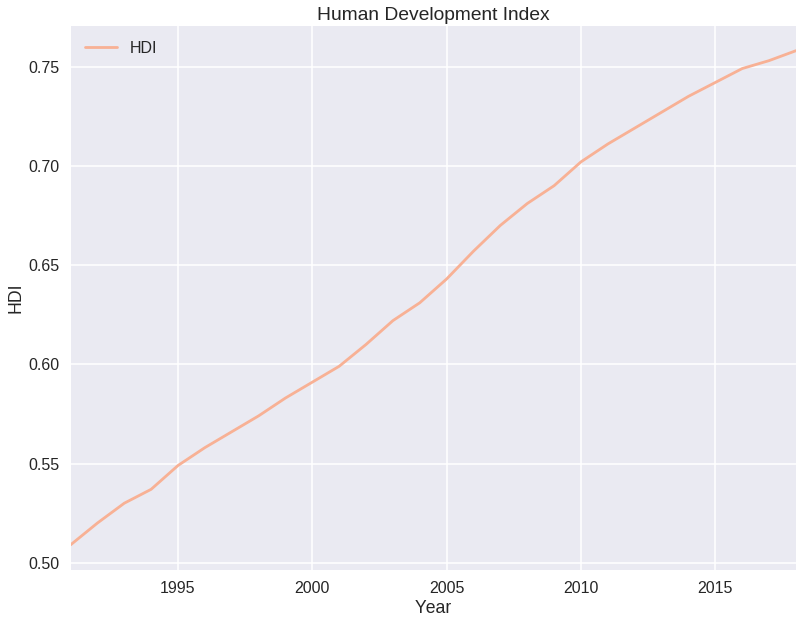

In [44]:
mpl.style.use('seaborn-poster')
hdi_chn.plot(figsize=(13,10), color='#f8b195'); 
plt.legend(loc='best'); 
plt.title("Human Development Index"); 
plt.xlabel('Year'); plt.ylabel('HDI');

In [82]:
from scipy.stats import norm 

merged_f = pd.merge(world_chn, summer_group, on='Year', how='left')
merged_m = pd.merge(merged_f, ath_fem, on='Year', how='left')
merged_g = pd.merge(merged_m, ath_mal, on='Year', how='left')
merged_h = pd.merge(merged_g, ath_age, on='Year', how='left')
merged_w = pd.merge(merged_h, ath_hei, on='Year', how='left')
merged_n = pd.merge(merged_w, ath_wei, on='Year', how='left')
merged_t = pd.merge(merged_n, ath_nam, on='Year', how='left')
merged_d = pd.merge(merged_t, ath_tot, on='Year', how='left')
merged = pd.merge(merged_d, hdi_chn, on='Year', how='left')
merged.head()

,Year,life_ex,gdp_pc,gdp,gni_pc,gni,sta_cap,sch_pri,lan_are,air_pol,food_pro,inc_120,inc_220,inc_320,inc_420,inc_520,pop_tot,urb_pop,fem_pop,0014_pop,1564_pop,65up_pop,Log_GDP,Log_Pop,Medal,fem_ath,mal_ath,Age,Height,Weight,nam_ath,tot_ath,HDI
0,1960,43.725,89.520542,5.971647e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667070000.0,16.203,48.455821,39.822192,56.489299,3.688510,24.812874,20.318406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,44.051,75.805838,5.005687e+10,NaN,NaN,NaN,NaN,9388250.0,NaN,13.36,NaN,NaN,NaN,NaN,NaN,660330000.0,16.708,48.483855,39.874431,56.414306,3.711263,24.636426,20.308250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,44.783,70.909412,4.720936e+10,70.0,4.578572e+10,NaN,NaN,9388250.0,NaN,14.11,NaN,NaN,NaN,NaN,NaN,665770000.0,17.226,48.508282,40.282471,56.043207,3.674322,24.577858,20.316455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,45.972,74.313643,5.070680e+10,80.0,5.245896e+10,NaN,NaN,9388250.0,NaN,14.89,NaN,NaN,NaN,NaN,NaN,682335000.0,17.757,48.530508,40.807495,55.593322,3.599183,24.649326,20.341031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,47.592,85.498555,5.970834e+10,90.0,6.133448e+10,NaN,NaN,9388250.0,NaN,16.05,NaN,NaN,NaN,NaN,NaN,698355000.0,18.299,48.552414,41.139201,55.348429,3.512369,24.812738,20.364238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
ath_fem

,fem_ath
Year,
1936,3
1948,1
1984,123
1988,194
1992,205
1996,259
2000,255
2004,317
2008,354


In [66]:
merged.head()

,Year,life_ex,gdp_pc,gdp,gni_pc,gni,sta_cap,sch_pri,lan_are,air_pol,food_pro,inc_120,inc_220,inc_320,inc_420,inc_520,pop_tot,urb_pop,fem_pop,0014_pop,1564_pop,65up_pop,Log_GDP,Log_Pop,Medal,fem_ath,mal_ath,Age,Height,Weight,nam_ath,tot_ath,HDI
0,1960,43.725,89.520542,5.971647e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667070000.0,16.203,48.455821,39.822192,56.489299,3.688510,24.812874,20.318406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,44.051,75.805838,5.005687e+10,NaN,NaN,NaN,NaN,9388250.0,NaN,13.36,NaN,NaN,NaN,NaN,NaN,660330000.0,16.708,48.483855,39.874431,56.414306,3.711263,24.636426,20.308250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,44.783,70.909412,4.720936e+10,70.0,4.578572e+10,NaN,NaN,9388250.0,NaN,14.11,NaN,NaN,NaN,NaN,NaN,665770000.0,17.226,48.508282,40.282471,56.043207,3.674322,24.577858,20.316455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,45.972,74.313643,5.070680e+10,80.0,5.245896e+10,NaN,NaN,9388250.0,NaN,14.89,NaN,NaN,NaN,NaN,NaN,682335000.0,17.757,48.530508,40.807495,55.593322,3.599183,24.649326,20.341031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,47.592,85.498555,5.970834e+10,90.0,6.133448e+10,NaN,NaN,9388250.0,NaN,16.05,NaN,NaN,NaN,NaN,NaN,698355000.0,18.299,48.552414,41.139201,55.348429,3.512369,24.812738,20.364238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


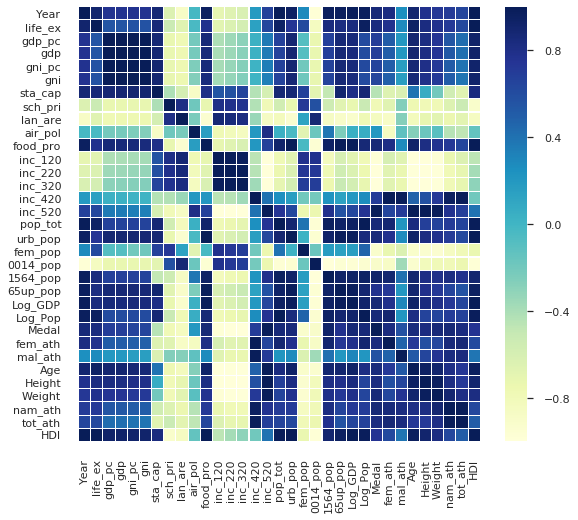

In [77]:
corrmat = merged.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

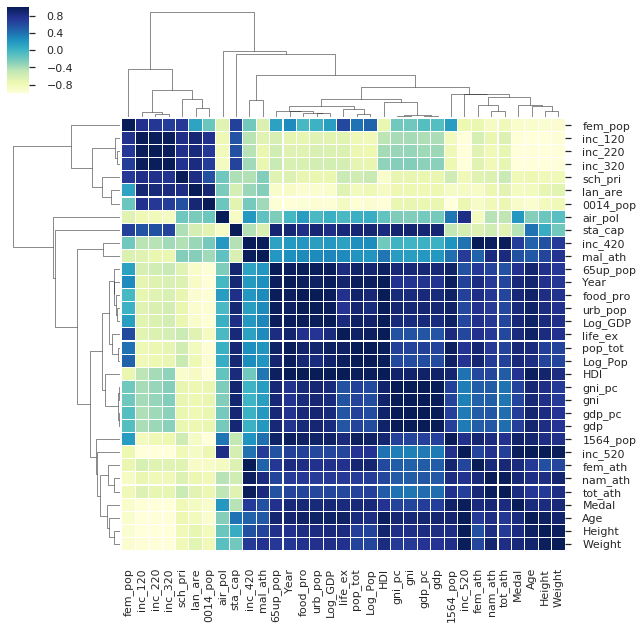

In [87]:
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [86]:
med_cor_a = corrmat.sort_values('Medal', ascending=0)
med_cor = med_cor_a.Medal

med_cor

Medal       1.000000
inc_520     0.987903
1564_pop    0.928620
Log_GDP     0.873396
nam_ath     0.872271
food_pro    0.867877
pop_tot     0.865852
Weight      0.863635
Log_Pop     0.862293
Year        0.862174
urb_pop     0.852074
Age         0.850965
life_ex     0.843559
fem_ath     0.839789
Height      0.833727
tot_ath     0.830141
65up_pop    0.778767
HDI         0.756001
inc_420     0.702495
gdp_pc      0.690418
gdp         0.682216
gni_pc      0.656020
gni         0.648327
mal_ath     0.572467
air_pol     0.201658
sta_cap    -0.437239
sch_pri    -0.786304
lan_are    -0.839306
0014_pop   -0.905030
fem_pop    -0.919971
inc_120    -0.976968
inc_320    -0.992464
inc_220    -0.992464
Name: Medal, dtype: float64

In [99]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(merged, 3))

Top Absolute Correlations
inc_520  Height    0.999951
gdp_pc   gdp       0.999892
gdp      gni_pc    0.999531
dtype: float64


In [79]:
medal_pred = merged[np.isfinite(merged['Medal'])]
medal_pred = medal_pred.set_index('Year')

medal_pred

,life_ex,gdp_pc,gdp,gni_pc,gni,sta_cap,sch_pri,lan_are,air_pol,food_pro,inc_120,inc_220,inc_320,inc_420,inc_520,pop_tot,urb_pop,fem_pop,0014_pop,1564_pop,65up_pop,Log_GDP,Log_Pop,Medal,fem_ath,mal_ath,Age,Height,Weight,nam_ath,tot_ath,HDI
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,68.231,250.713969,2.599465e+11,250.0,2.594381e+11,NaN,111.586197,9388250.000,NaN,36.56,NaN,NaN,NaN,NaN,NaN,1.036825e+09,22.203,48.692424,31.629335,63.158799,5.211865,26.283742,20.759429,26.0,123.0,200.0,22.095975,172.074303,65.705882,215.0,323.0,NaN
1988,68.954,283.537695,3.123536e+11,330.0,3.655351e+11,NaN,128.099396,9388250.000,NaN,42.31,NaN,NaN,NaN,NaN,NaN,1.101630e+09,24.974,48.692272,29.294259,65.204299,5.501441,26.467402,20.820057,23.0,194.0,233.0,22.477752,171.259953,65.412178,271.0,427.0,NaN
1992,69.355,366.460692,4.269157e+11,390.0,4.599698e+11,NaN,121.724487,9388250.000,NaN,52.32,NaN,NaN,NaN,NaN,NaN,1.164970e+09,28.200,48.690057,28.206457,66.006201,5.787342,26.779852,20.875961,44.0,205.0,189.0,22.071066,170.857143,64.971867,243.0,394.0,0.520
1996,70.140,709.413755,8.637467e+11,650.0,7.954299e+11,NaN,108.074158,9388230.000,NaN,69.70,7.4,11.5,15.9,22.4,42.9,1.217550e+09,31.916,48.693549,26.318062,67.388872,6.293066,27.484545,20.920106,43.0,259.0,179.0,22.132420,170.426606,65.311927,289.0,438.0,0.558
2000,71.397,959.372484,1.211347e+12,940.0,1.181545e+12,NaN,NaN,9388220.000,60.704839,83.36,NaN,NaN,NaN,NaN,NaN,1.262645e+09,35.877,48.689523,24.788721,68.399426,6.811853,27.822754,20.956475,45.0,255.0,159.0,22.550725,171.000000,64.702899,266.0,414.0,0.591
2004,72.689,1508.668098,1.955347e+12,1510.0,1.959579e+12,64.444444,NaN,9388212.500,NaN,96.48,NaN,NaN,NaN,NaN,NaN,1.296075e+09,41.144,48.650386,21.124426,71.508852,7.366722,28.301589,20.982606,55.0,317.0,201.0,22.980695,172.812741,66.365830,372.0,518.0,0.631
2008,73.835,3468.304463,4.594307e+12,3100.0,4.104282e+12,61.111111,100.742440,9388210.625,NaN,113.95,5.2,9.4,14.5,22.5,48.4,1.324655e+09,46.539,48.616526,19.054665,73.129611,7.815724,29.155839,21.004418,85.0,354.0,376.0,23.920548,176.008276,69.903448,583.0,730.0,0.681
2012,75.013,6316.918863,8.532231e+12,5930.0,8.005852e+12,70.000000,99.791100,9388211.250,63.827017,127.70,5.3,9.7,14.7,22.4,47.8,1.350695e+09,51.765,48.617733,18.369664,73.177028,8.453308,29.774872,21.023885,74.0,267.0,212.0,23.958246,175.440501,68.626305,365.0,479.0,0.719
2016,76.210,8078.790474,1.113795e+13,8210.0,1.132397e+13,80.000000,97.961920,9388210.000,52.211322,139.03,NaN,NaN,NaN,NaN,NaN,1.378665e+09,56.736,48.654380,17.994616,72.202753,9.802631,30.041379,21.044381,61.0,295.0,204.0,23.971944,175.000000,67.955912,390.0,499.0,0.749


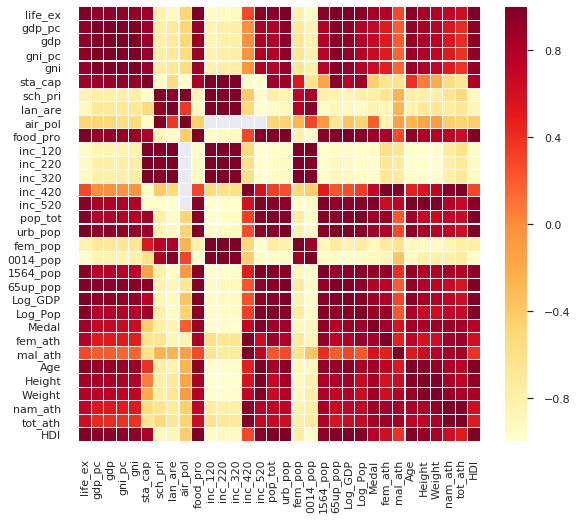

In [92]:
corrmat2 = medal_pred.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat2, ax = ax, cmap ="YlOrRd", linewidths = 0.1) 

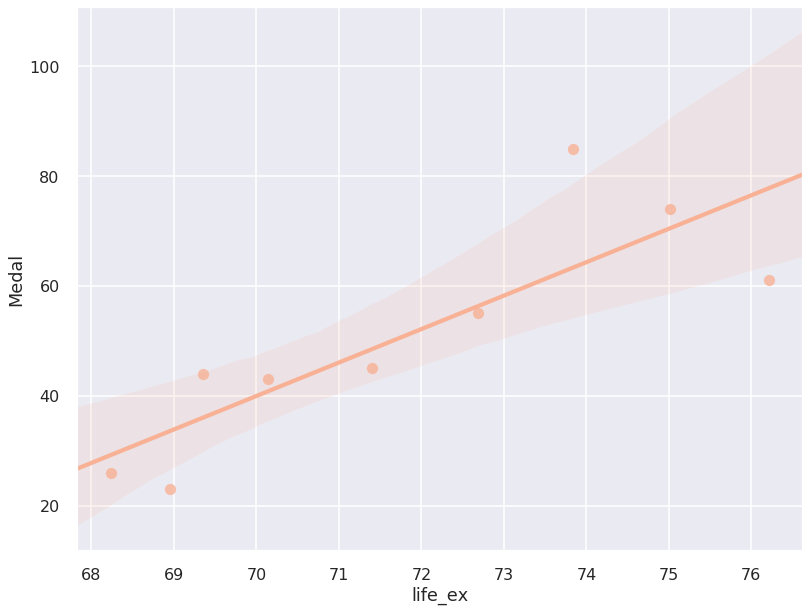

In [101]:
plt.figure(figsize=(13, 10))
sns.regplot(x="life_ex", y="Medal", data=medal_pred, color="#f8b195");

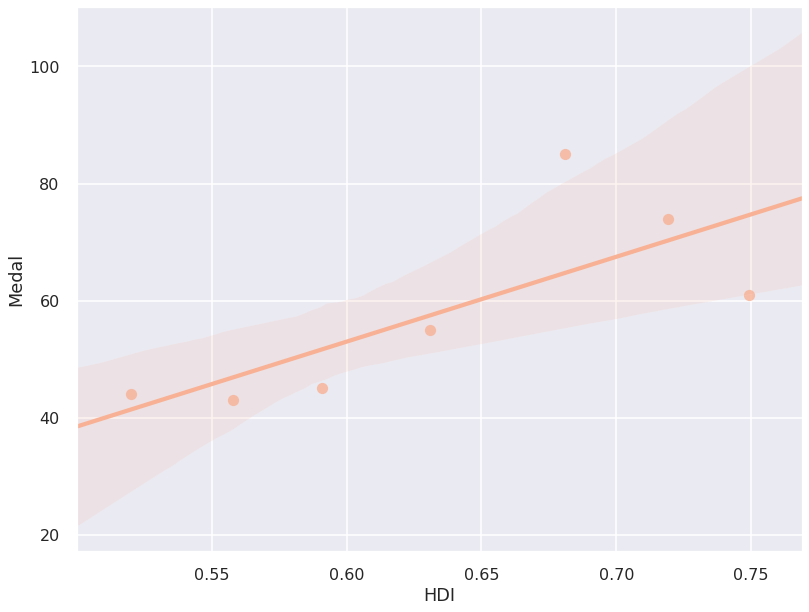

In [104]:
plt.figure(figsize=(13, 10))
sns.regplot(x="HDI", y="Medal", data=medal_pred, color="#f8b195");

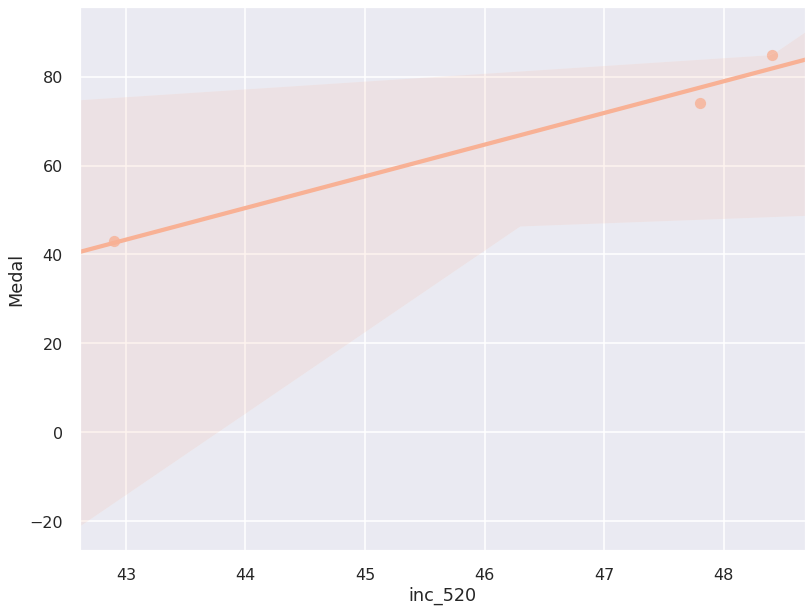

In [102]:
plt.figure(figsize=(13, 10))
sns.regplot(x="inc_520", y="Medal", data=medal_pred, color="#f8b195");

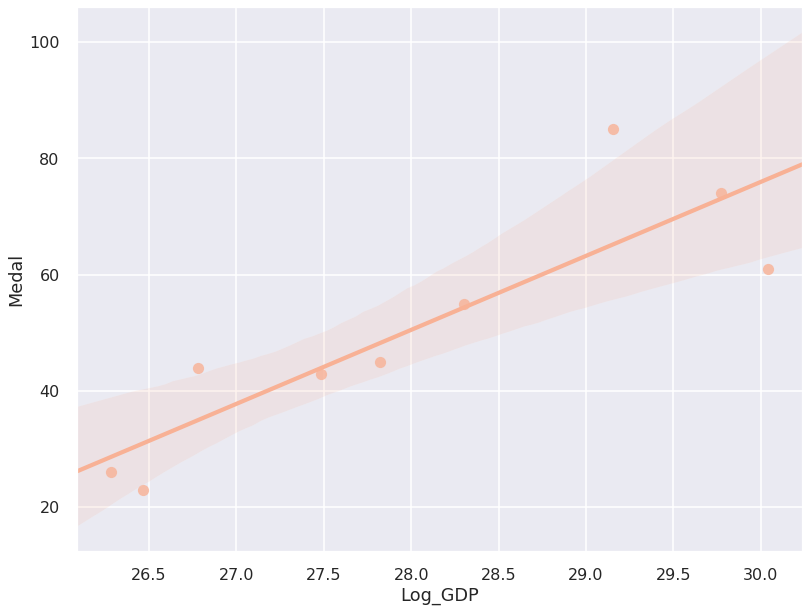

In [105]:
plt.figure(figsize=(13, 10))
sns.regplot(x="Log_GDP", y="Medal", data=medal_pred, color="#f8b195");

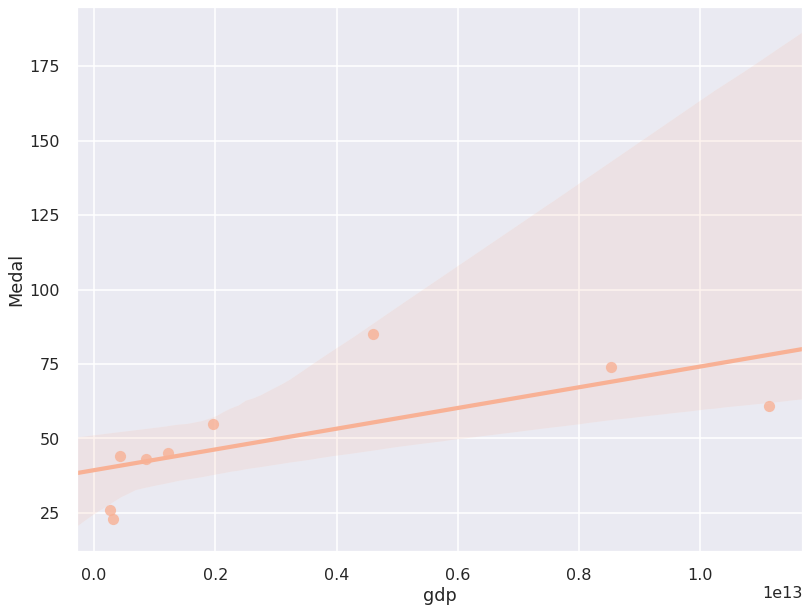

In [107]:
plt.figure(figsize=(13, 10))
sns.regplot(x="gdp", y="Medal", data=medal_pred, color="#f8b195");

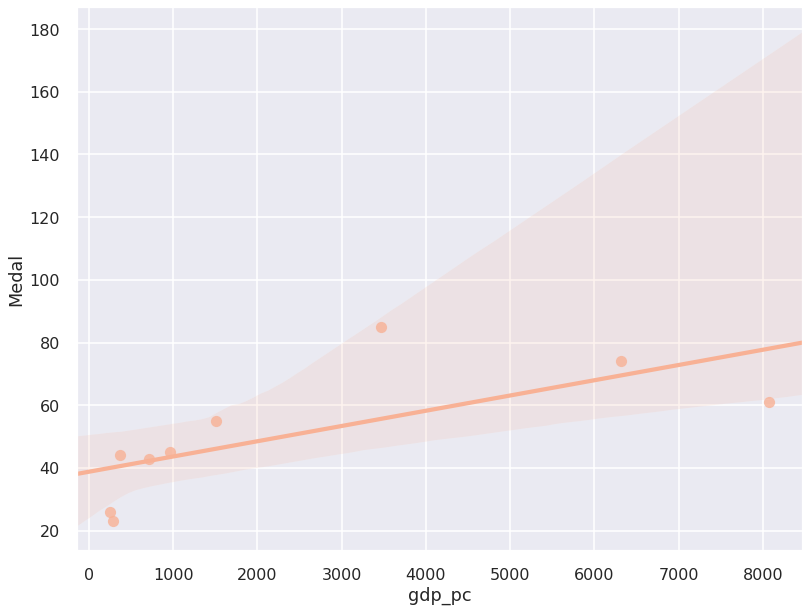

In [106]:
plt.figure(figsize=(13, 10))
sns.regplot(x="gdp_pc", y="Medal", data=medal_pred, color="#f8b195");

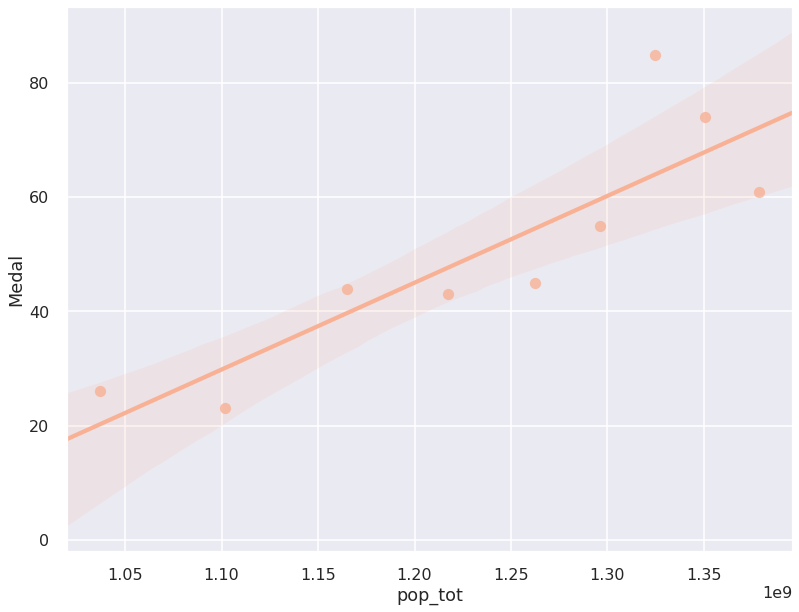

In [108]:
plt.figure(figsize=(13, 10))
sns.regplot(x="pop_tot", y="Medal", data=medal_pred, color="#f8b195");

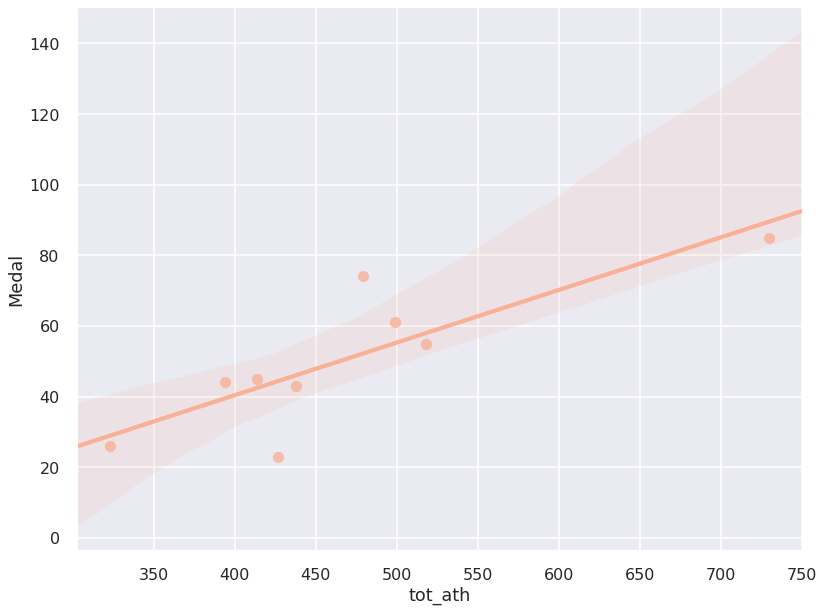

In [111]:
plt.figure(figsize=(13, 10))
sns.regplot(x="tot_ath", y="Medal", data=medal_pred, color="#f8b195");

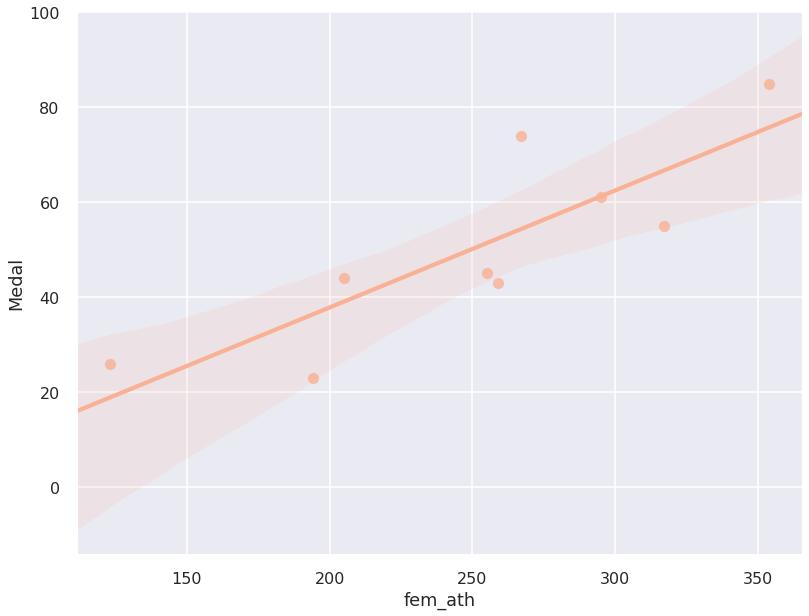

In [112]:
plt.figure(figsize=(13, 10))
sns.regplot(x="fem_ath", y="Medal", data=medal_pred, color="#f8b195");

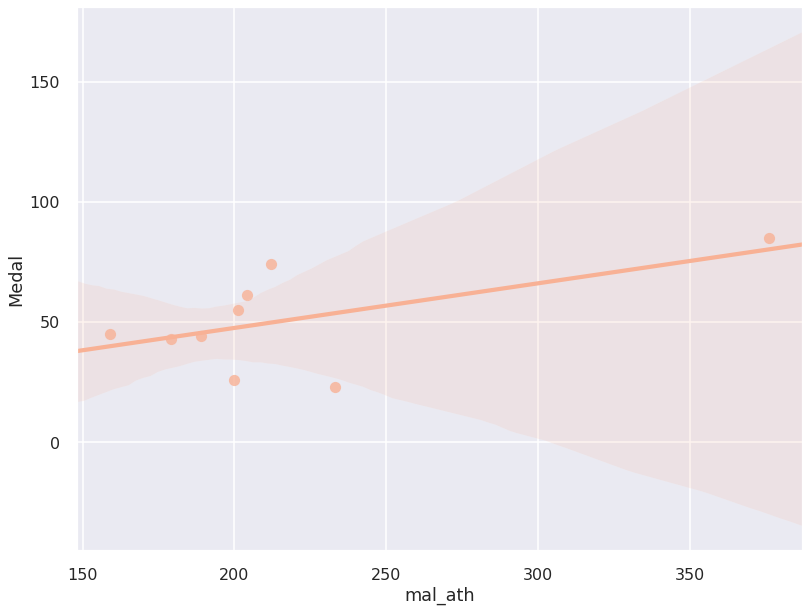

In [113]:
plt.figure(figsize=(13, 10))
sns.regplot(x="mal_ath", y="Medal", data=medal_pred, color="#f8b195");

In [93]:
med_cor2_a = corrmat2.sort_values('Medal', ascending=0)
med_cor2 = med_cor2_a.Medal

med_cor2

Medal       1.000000
inc_520     0.987903
1564_pop    0.928620
Log_GDP     0.873396
nam_ath     0.872271
food_pro    0.867877
pop_tot     0.865852
Weight      0.863635
Log_Pop     0.862293
urb_pop     0.852074
Age         0.850965
life_ex     0.843559
fem_ath     0.839789
Height      0.833727
tot_ath     0.830141
65up_pop    0.778767
HDI         0.756001
inc_420     0.702495
gdp_pc      0.690418
gdp         0.682216
gni_pc      0.656020
gni         0.648327
mal_ath     0.572467
air_pol     0.201658
sta_cap    -0.437239
sch_pri    -0.786304
lan_are    -0.839306
0014_pop   -0.905030
fem_pop    -0.919971
inc_120    -0.976968
inc_320    -0.992464
inc_220    -0.992464
Name: Medal, dtype: float64

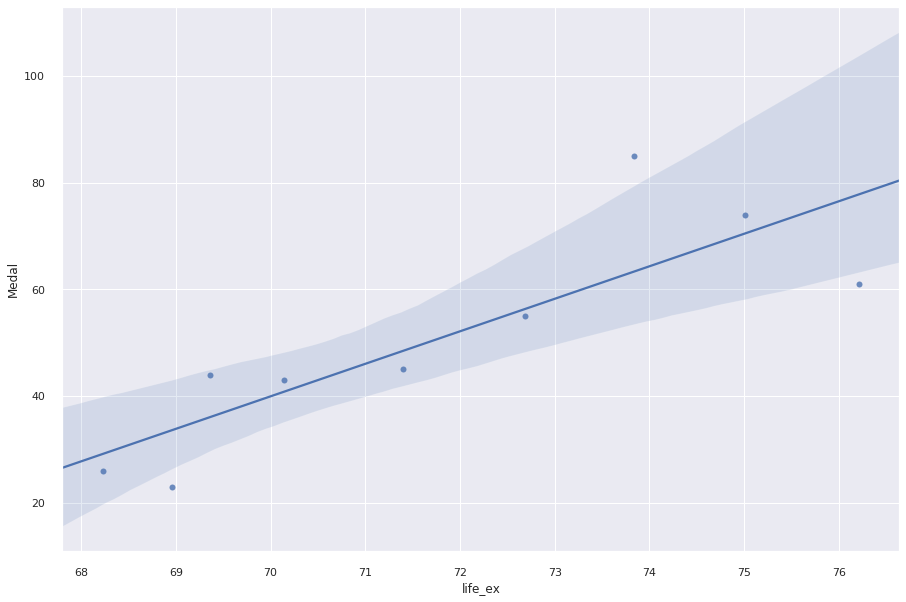

In [95]:
plt.figure(figsize=(15, 10))
sns.regplot(x="life_ex", y="Medal", data=medal_pred);

In [128]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics

# regression model
y, X = dmatrices('Medal ~ gdp_pc + pop_tot + tot_ath + HDI', 
                data = merged,
                return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     11.70
Date:                Tue, 17 Dec 2019   Prob (F-statistic):             0.0803
Time:                        06:09:49   Log-Likelihood:                -17.746
No. Observations:                   7   AIC:                             45.49
Df Residuals:                       2   BIC:                             45.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    493.2300    245.779      2.007      0.183    -564.273    1550.733
gdp_pc        -0.0131      0.008     -1.719      0.228      -0.046       0.020
pop_tot    -1.055e-06   5.04e-07     -2.094      0.171   -3.22e-06    1.11e-06
tot_ath        0.0183      0.051      0.361      0.753      -0.200       0.236
HDI         1496.7682    715.108      2.093      0.171   -1580.094    4573.630
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.884
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.434
Skew:                          -0.338   Prob(JB):                        0.805
Kurtosis:                       1.984   Cond. No.                     4.48e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
# what is the error associated with this prediction?
y_predicted = result.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

3.053292015842752

In [126]:
# regression model
y, X = dmatrices('Medal ~ Log_GDP + pop_tot + tot_ath + HDI', 
                data = medal_pred,
                return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     5.569
Date:                Tue, 17 Dec 2019   Prob (F-statistic):              0.158
Time:                        06:03:00   Log-Likelihood:                -20.191
No. Observations:                   7   AIC:                             50.38
Df Residuals:                       2   BIC:                             50.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -419.9007    848.785     -0.495      0.670   -4071.926    3232.125
Log_GDP       27.3622     40.190      0.681      0.566    -145.560     200.284
pop_tot    -2.067e-07   2.73e-07     -0.757      0.528   -1.38e-06    9.69e-07
tot_ath        0.0936      0.035      2.711      0.113      -0.055       0.242
HDI         -129.0113    673.666     -0.192      0.866   -3027.564    2769.541
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.589
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.488
Skew:                          -0.386   Prob(JB):                        0.784
Kurtosis:                       1.963   Cond. No.                     4.55e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# what is the error associated with this prediction?
y_predicted = result.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

3.249342370791572

In [116]:
result

**Referensi**

https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games#7.-Medals-per-country

https://chinapower.csis.org/dominant-china-olympic-games/

https://medium.com/@vineet_kapoor_2019/predictive-modelling-on-olympics-8f6f257e6f37

https://towardsdatascience.com/olympics-kaggle-dataset-exploratory-analysis-part-2-understanding-sports-4b8d73a8ec30

https://towardsdatascience.com/the-tokyo-2020-olympic-champions-ad6bcc7fac72

http://theconversation.com/olympic-medal-forecasting-its-easier-to-predict-results-than-you-might-think-62501

https://www.telegraph.co.uk/finance/economics/10623221/Winter-Olympics-Does-your-GDP-predict-how-many-medals-you-will-win.html

http://faculty.tuck.dartmouth.edu/images/uploads/faculty/andrew-bernard/bernardrestatjournalversion.pdf

https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00915.x

https://www.theguardian.com/sport/2019/jul/23/tokyo-olympics-2020-medal-table-predictions

https://www.geeksforgeeks.org/exploring-correlation-in-python/

https://www.geeksforgeeks.org/python-pandas-index-value_counts/

https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

https://wbdata.readthedocs.io/en/latest/wbdata.html

http://abdulbaqi.io/2017/09/13/Wdi/

https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

https://www.analyticsvidhya.com/blog/2015/09/build-predictive-model-10-minutes-python/

https://qz.com/1514933/chinas-population-could-start-shrinking-in-8-years/

https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction#Can-we-predict-the-medal-tally-of-a-country?

https://www.britannica.com/topic/one-child-policy

https://fas.org/sgp/crs/row/RL33534.pdf

https://www.dw.com/en/chinas-gdp-growth-slows-to-27-year-low/a-50881319

https://www.imf.org/en/News/Articles/2019/08/09/na080919-chinas-economic-outlook-in-six-charts

https://www.mckinsey.com/featured-insights/china/china-brief-the-state-of-the-economy

https://www.theguardian.com/news/datablog/2012/mar/23/china-gdp-since-1980

https://stats.stackexchange.com/questions/118373/what-are-the-advantages-of-using-log-gdp-per-capita-versus-simple-gdp-per-capita